# 1.数据预处理

In [9]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, fowlkes_mallows_score, v_measure_score

df = pd.read_excel('DryBeanDataset/Dry_Bean_Dataset.xlsx')

# 检查并处理缺失值,无缺失值
print(df.isnull().sum())
df = df.dropna()

# 没有非数值数据，跳过

# 特征标准化
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_std = StandardScaler().fit_transform(X)
df_scaled = pd.DataFrame(X_std, columns=X.columns)
df_scaled['Class'] = y

df_scaled.to_csv('DryBeanDataset/Dry_Bean_Dataset_preprocessed.csv', index=False)

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64


# 2.t-SNE降维和可视化

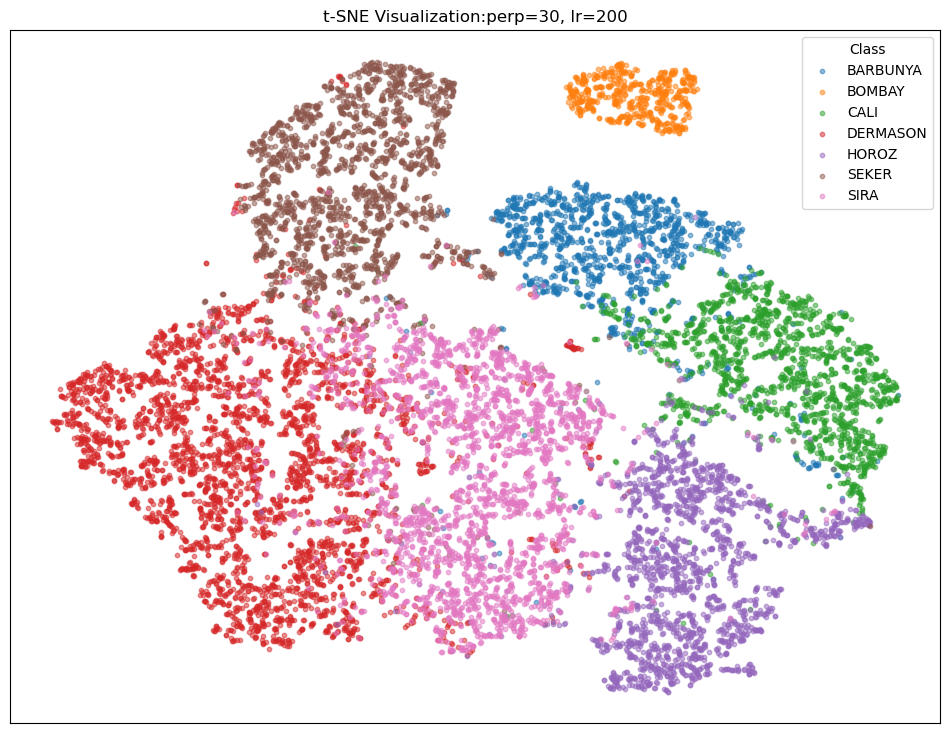

In [10]:

per=30
lr=200
tsne = TSNE(perplexity=per, learning_rate=lr, random_state=0,max_iter=1000)
X_tsne = tsne.fit_transform(X_std)
y_num = LabelEncoder().fit_transform(y)
unique_labels = np.unique(y_num)
cmap = plt.get_cmap('tab10')  
colors = [cmap(i) for i in range(len(unique_labels))]

plt.figure(figsize=(12, 9))
# for i in np.unique(y_num):
for i, label in enumerate(unique_labels):
    plt.scatter(
        # X_tsne[y_num == i, 0], 
        # X_tsne[y_num == i, 1], 
        X_tsne[y_num == label, 0], 
        X_tsne[y_num == label, 1],
        s=10, 
        alpha=0.5, 
        color=colors[i],
        label=str(np.unique(y)[i]) 
    )
plt.title(f"t-SNE Visualization:perp={per}, lr={lr}")
plt.legend(title="Class")
plt.xticks([])
plt.yticks([])
plt.savefig('tsne_result.png', bbox_inches='tight')


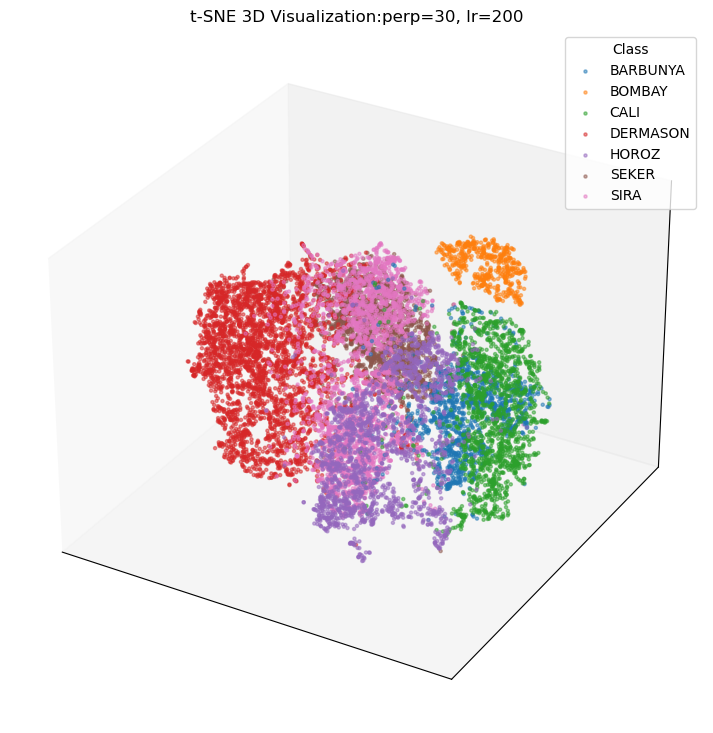

In [11]:

per=30
lr=200
tsne = TSNE(n_components=3,perplexity=per, learning_rate=lr, random_state=0,max_iter=1000)
X_tsne = tsne.fit_transform(X_std)
y_num = LabelEncoder().fit_transform(y)

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# for i in np.unique(y_num):
for i, label in enumerate(unique_labels):
    ax.scatter(
        # X_tsne[y_num == i, 0], 
        # X_tsne[y_num == i, 1], 
        # X_tsne[y_num == i, 2],
        X_tsne[y_num == label, 0], 
        X_tsne[y_num == label, 1], 
        X_tsne[y_num == label, 2],
        s=5, 
        alpha=0.5, 
        color=colors[i],
        label=str(np.unique(y)[i]) 
    )
plt.title(f"t-SNE 3D Visualization:perp={per}, lr={lr}")
plt.legend(title="Class")
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

plt.savefig('tsne_result_3D.png', bbox_inches='tight')

In [ ]:
perplexities = [5, 30, 50, 100]
learning_rates = [100, 200, 500]

y_num = LabelEncoder().fit_transform(y)
unique_labels = np.unique(y)
n_classes = len(unique_labels)

plt.figure(figsize=(16, 20))

for i, perp in enumerate(perplexities):
    for j, lr in enumerate(learning_rates):
        tsne = TSNE(perplexity=perp, learning_rate=lr, random_state=0,max_iter=5000,n_iter_without_progress=300)
        X_tsne = tsne.fit_transform(X_std)

        ax = plt.subplot(4, 3, i*3 + j + 1)
        for k in range(n_classes):
            ax.scatter(
                X_tsne[y_num == k, 0],
                X_tsne[y_num == k, 1],
                s=15,
                alpha=0.3,
                cmap='tab10',
            )
        ax.set_title(f"t-SNE:perp={perp}, lr={lr}")
        ax.set_xticks([])
        ax.set_yticks([])

plt.tight_layout()
plt.savefig('tsne_result1.png', bbox_inches='tight')

# 3.聚类

In [12]:
tsne = TSNE(perplexity=30, learning_rate=200, random_state=0,max_iter=1000)
X_tsne = tsne.fit_transform(X_std)

## 3.1 KMeans

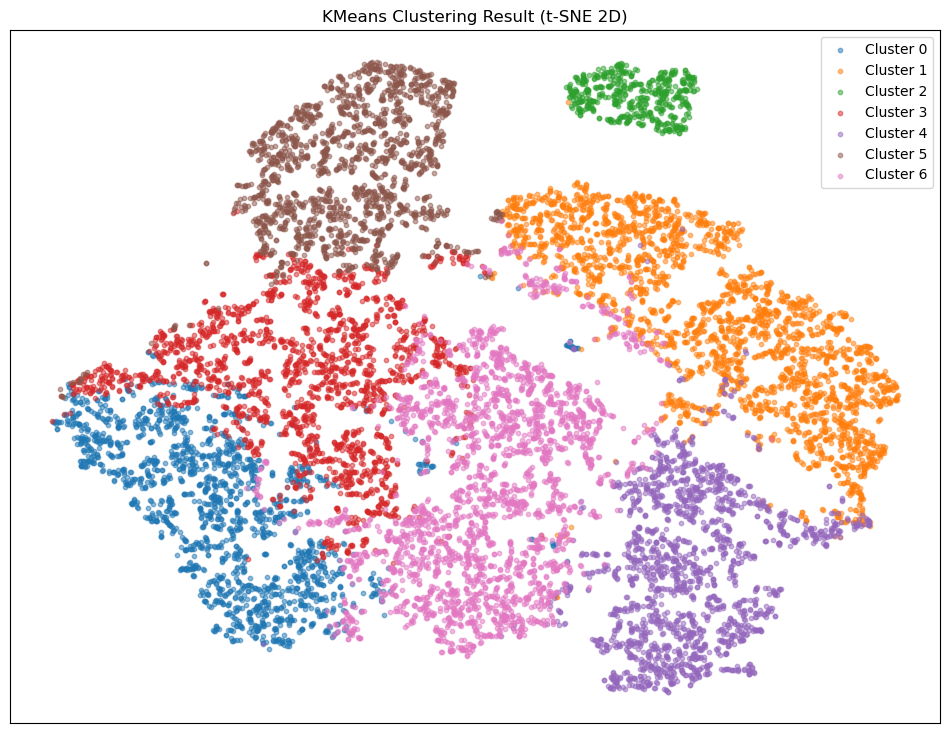

In [13]:

n_clusters = len(np.unique(y))  
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
cluster_labels = kmeans.fit_predict(X_std)

plt.figure(figsize=(12, 9))
for i in range(n_clusters):
    plt.scatter(
        X_tsne[cluster_labels == i, 0],
        X_tsne[cluster_labels == i, 1],
        s=10,
        alpha=0.5,
        label=f'Cluster {i}'
    )    
plt.title("KMeans Clustering Result (t-SNE 2D)")
plt.legend()
plt.xticks([])
plt.yticks([])
plt.savefig('kmeans_tsne_result.png', bbox_inches='tight')
plt.show()

In [14]:
#External指标
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, fowlkes_mallows_score, v_measure_score

ari = adjusted_rand_score(y, kmeans.labels_)
nmi = normalized_mutual_info_score(y, kmeans.labels_)
fmi = fowlkes_mallows_score(y, kmeans.labels_)
vms = v_measure_score(y, kmeans.labels_)
print(f"ARI: {ari:.3f}, NMI: {nmi:.3f}, FMI: {fmi:.3f}, V-measure: {vms:.3f}")

ARI: 0.572, NMI: 0.690, FMI: 0.644, V-measure: 0.690


In [15]:
#Internal指标
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

silhouette = silhouette_score(X_std, kmeans.labels_)
calinski = calinski_harabasz_score(X_std, kmeans.labels_)
davies = davies_bouldin_score(X_std, kmeans.labels_)

print(f"Silhouette: {silhouette:.3f}, Calinski-Harabasz: {calinski:.3f}, Davies-Bouldin: {davies:.3f}")

Silhouette: 0.257, Calinski-Harabasz: 6986.517, Davies-Bouldin: 1.218


## 3.2 Agglomerative Hierarchical Clustering

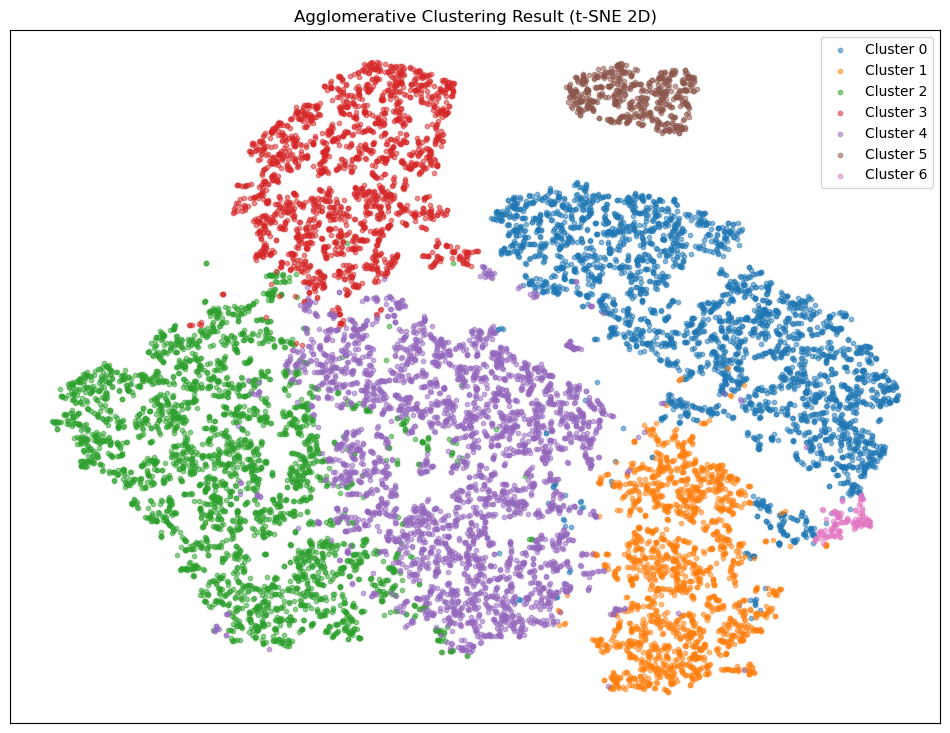

In [16]:

n_clusters = len(np.unique(y))
agg = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
cluster_labels = agg.fit_predict(X_std)

plt.figure(figsize=(12, 9))
n_clusters = len(np.unique(cluster_labels))

for i in range(n_clusters):
    plt.scatter(
        X_tsne[cluster_labels == i, 0],
        X_tsne[cluster_labels == i, 1],
        s=10,
        alpha=0.5,
        label=f'Cluster {i}'
    )
plt.title("Agglomerative Clustering Result (t-SNE 2D)")
plt.legend()
plt.xticks([])
plt.yticks([])
plt.savefig('agg_tsne_result.png', bbox_inches='tight')
plt.show()

In [17]:
ari = adjusted_rand_score(y, cluster_labels)
nmi = normalized_mutual_info_score(y, cluster_labels)
fmi = fowlkes_mallows_score(y, cluster_labels)
vms = v_measure_score(y, cluster_labels)
print(f"ARI: {ari:.3f}, NMI: {nmi:.3f}, FMI: {fmi:.3f}, V-measure: {vms:.3f}")

ARI: 0.658, NMI: 0.733, FMI: 0.722, V-measure: 0.733


In [18]:
silhouette = silhouette_score(X_std, cluster_labels)
calinski = calinski_harabasz_score(X_std, cluster_labels)
davies = davies_bouldin_score(X_std, cluster_labels)
print(f"Silhouette: {silhouette:.3f}, Calinski-Harabasz: {calinski:.3f}, Davies-Bouldin: {davies:.3f}")

Silhouette: 0.284, Calinski-Harabasz: 6981.274, Davies-Bouldin: 1.106
